# Exploratory Data Analysis

The main objectives for this notebook are:
- Identify correlations among the numerical features
- Observe the relationship of the features with the target variable
 



In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
app_train_clean_df = pd.read_csv('../data/Data 1.1 - application_train_cleaned.csv')
app_train_clean_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,True,Cash loans,M,False,True,0,202500.0,406597.5,24700.5,...,False,False,False,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,False,Cash loans,F,False,False,0,270000.0,1293502.5,35698.5,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,False,Revolving loans,M,True,True,0,67500.0,135000.0,6750.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,False,Cash loans,F,False,True,0,135000.0,312682.5,29686.5,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,False,Cash loans,M,False,True,0,121500.0,513000.0,21865.5,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,False,Cash loans,M,False,False,0,157500.0,254700.0,27558.0,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,25
307507,456252,False,Cash loans,F,False,True,0,72000.0,269550.0,12001.5,...,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,56
307508,456253,False,Cash loans,F,False,True,0,153000.0,677664.0,29979.0,...,False,False,False,1.0,0.0,0.0,1.0,0.0,1.0,41
307509,456254,True,Cash loans,F,False,True,0,171000.0,370107.0,20205.0,...,False,False,False,0.0,0.0,0.0,0.0,0.0,0.0,32


In [16]:
def is_boolean_column(df: pd.DataFrame, col: str) -> bool:
    """
    Args:
        df: pd.DataFrame to check for column
        col: column to check
    Ret:
        bool: identifies int columns that can be turned into bool columns
    """
    # Check which columns have values of only 0 or 1
    if df[col].dropna().isin([0, 1]).all():
        return True
    return False

# Iteratively check columns containing only 0, 1 or NaN
bool_cols = [col for col in app_train_clean_df.columns if is_boolean_column(app_train_clean_df, col)]

In [17]:
app_train_df_withbool = app_train_clean_df.copy()

# Change datatype of identified columns
app_train_df_withbool[bool_cols] = app_train_df_withbool[bool_cols].astype(bool)

app_train_df_withbool.dtypes.value_counts()

float64    65
bool       36
object     13
int64       9
Name: count, dtype: int64

In [76]:
# Defining groupings
demographic_cols = ['CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'AGE']
transaction_cols = ['NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
socioeconomic_cols = ['AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
socioeconomic_misc_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

household_cols = ['NAME_HOUSING_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
                  'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                  'LIVE_CITY_NOT_WORK_CITY']

residence_specs_cols = list(app_train_df_withbool.columns[44:90])
social_circle_cols = list(app_train_df_withbool.columns[91:95])
documents_cols = list(app_train_df_withbool.columns[96:116])
bureau_cols = list(app_train_df_withbool.columns[116:122])

# Univariate analysis

In [6]:
sns.set_style("whitegrid")

## Target Variable

TARGET
False    0.919271
True     0.080729
Name: count, dtype: float64

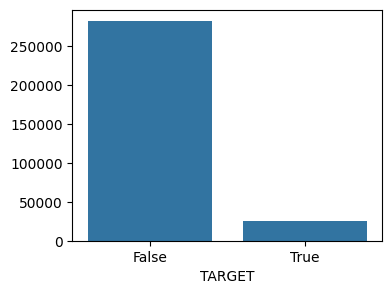

In [19]:
fig, ax = plt.subplots(figsize=(4,3))
sns.countplot(x='TARGET', data=app_train_df_withbool)
plt.ylabel('')

app_train_clean_df['TARGET'].value_counts()/len(app_train_df_withbool)

**Observations**
- One-sixth have terminated the company's services. Churn is also our target variable for the dataset.

In [138]:
def draw_mean_median(df, col, axes, i, ncols):
    """
    Function for drawing a mean and median line.
    Arg: df['column']
    """
    print(str(i//ncols), (i%ncols), '| mean: ', df[col].mean(), ' | median:', df[col].median())
    axes[(i//ncols), (i%ncols)].axvline(x=df[col].mean(),
            color='red',
            label='mean')
    axes[(i//ncols), (i%ncols)].axvline(x=df[col].median(),
            color='green',
            ls='--',
            label='median')
    

def multi_dtype_plot(df: pd.DataFrame, col_list:list, nrows:int, ncols:int, xtick_rotation=0, align='right'):
    """
    Plots different types of columns in a grid of subplots.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    col_list (list): List of column names to plot.
    nrows (int): Number of rows in the subplot grid.
    ncols (int): Number of columns in the subplot grid.
    xtick_rotation (int, optional): Degrees to rotate the x-tick labels. Default is 0.
    """    
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(14,10))

    for i, col in enumerate(col_list):
        irow = i//ncols
        icol = i%ncols
        if df[col].dtypes == 'object':
            sns.countplot(x=df[col], data=df, ax=axes[irow, icol])
            axes[irow, icol].set_ylabel('')
            axes[irow, icol].set_xticklabels(axes[irow, icol].get_xticklabels(), rotation=xtick_rotation,
                        horizontalalignment=align)

        elif df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
            sns.histplot(x=df[col], ax=axes[irow, icol], bins=20)
            draw_mean_median(df, col, axes, i, ncols)
            axes[irow, (i%ncols)].set_ylabel('')
    fig.subplots_adjust(wspace=0.2, hspace=0.2)

## Demographic information

C:\Users\Marco\AppData\Local\Temp\ipykernel_24364\265503519.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[irow, icol].set_xticklabels(axes[irow, icol].get_xticklabels(), rotation=xtick_rotation,


0 1 | mean:  0.4170517477423572  | median: 0.0


C:\Users\Marco\AppData\Local\Temp\ipykernel_24364\265503519.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[irow, icol].set_xticklabels(axes[irow, icol].get_xticklabels(), rotation=xtick_rotation,


1 1 | mean:  43.43596814422899  | median: 43.0


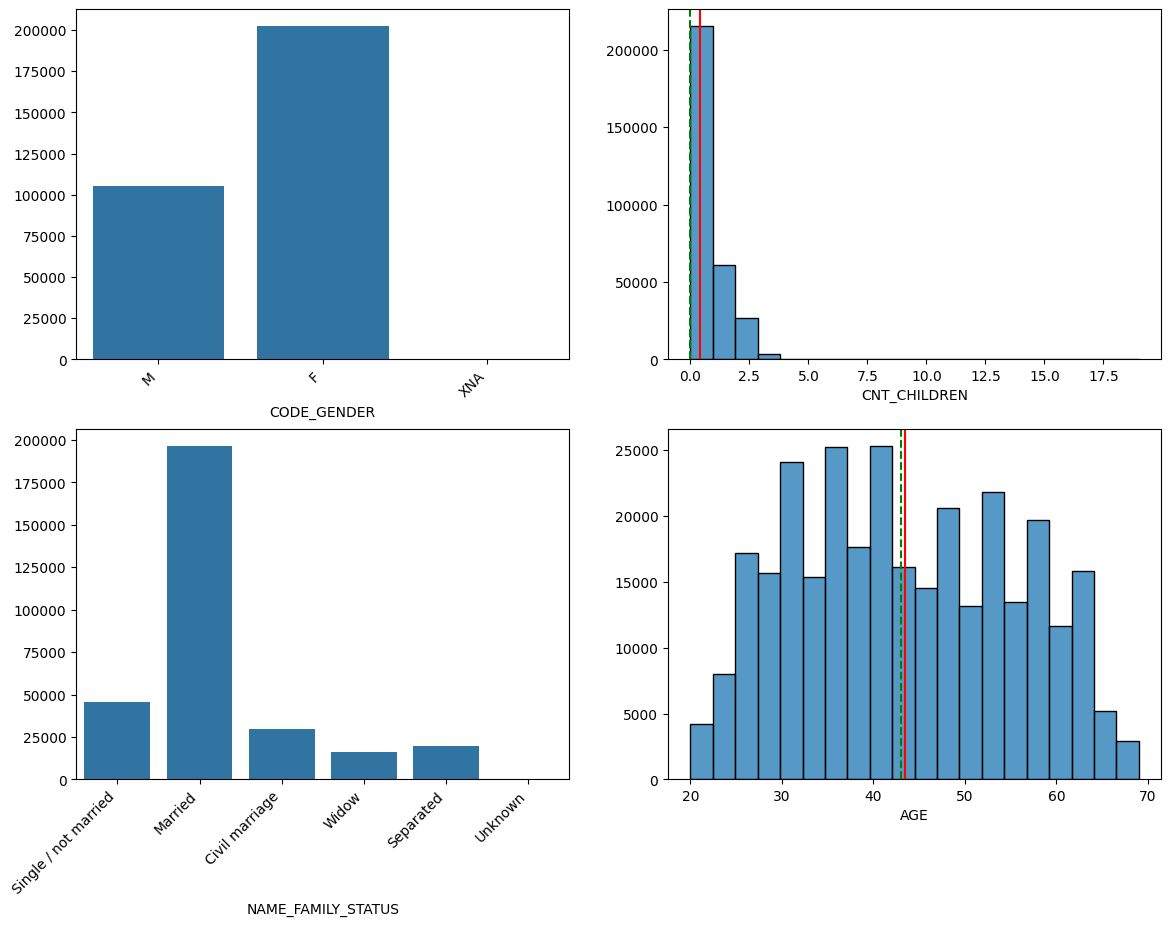

In [139]:
multi_dtype_plot(app_train_df_withbool, demographic_cols, 2, 2, 45)

In [121]:
from scipy.stats import kstest

def percent_summary(df, column, items):
    """
    Prints percentage summary of aggregated data.

    Args:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The name of the column of interest.
        items: Number of value counts to show in the summary.
    """
    counts_series = df[column].value_counts(normalize=True)
    print(column)
    for i in range(items):
        print(f'{counts_series.index[i]}: {counts_series.iat[i]*100:.2f}%')
    print()

def ksresults(df, column, ddof=1, alpha=0.05):
    """
    Displays the comparison of the data distribution to a normal distribution.
    
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The name of the column of interest.
        ddof (int): Degrees of freedom. Set to 1 by default for sample population; set to 0 for population data.
        alpha (float): Confidence level, set to 0.05 by default.
    """
    
    statistic, p_val = kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column], ddof=ddof)))
    print(f'KS Statistic: {statistic:.4f}')
    print(f'p-value: {p_val}')
    if p_val <= alpha:
        print('Reject null hypothesis. Data does not come from a normal distribution.')
    else:
        print('Fail to reject null hypothesis. Data does not show sufficient evidence of deviating from a normal distribution.')

In [122]:
percent_summary(app_train_df_withbool, 'CODE_GENDER', items=2)
percent_summary(app_train_df_withbool, 'CNT_CHILDREN', items=2)
percent_summary(app_train_df_withbool, 'NAME_FAMILY_STATUS', items=2)
ksresults(app_train_df_withbool, 'AGE')

CODE_GENDER
F: 65.83%
M: 34.16%

CNT_CHILDREN
0: 70.04%
1: 19.88%

NAME_FAMILY_STATUS
Married: 63.88%
Single / not married: 14.78%

KS Statistic: 0.0614
p-value: 0.0
Reject null hypothesis. Data does not come from a normal distribution.


### Insights
- 2 out of 3 of the applicants are female, and 1 of out 3 are male.
- 70% of the applicants do not have a child, and 20% have one child.
- Almost 2 out of 3 applicants are single.
- Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test. Therefore, the ages do not come from a normal distribution.

# Transaction details

C:\Users\Marco\AppData\Local\Temp\ipykernel_24364\265503519.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[irow, icol].set_xticklabels(axes[irow, icol].get_xticklabels(), rotation=xtick_rotation,


0 1 | mean:  599025.9997057016  | median: 513531.0
1 0 | mean:  27108.573909183444  | median: 24903.0
1 1 | mean:  538396.2074288895  | median: 450000.0


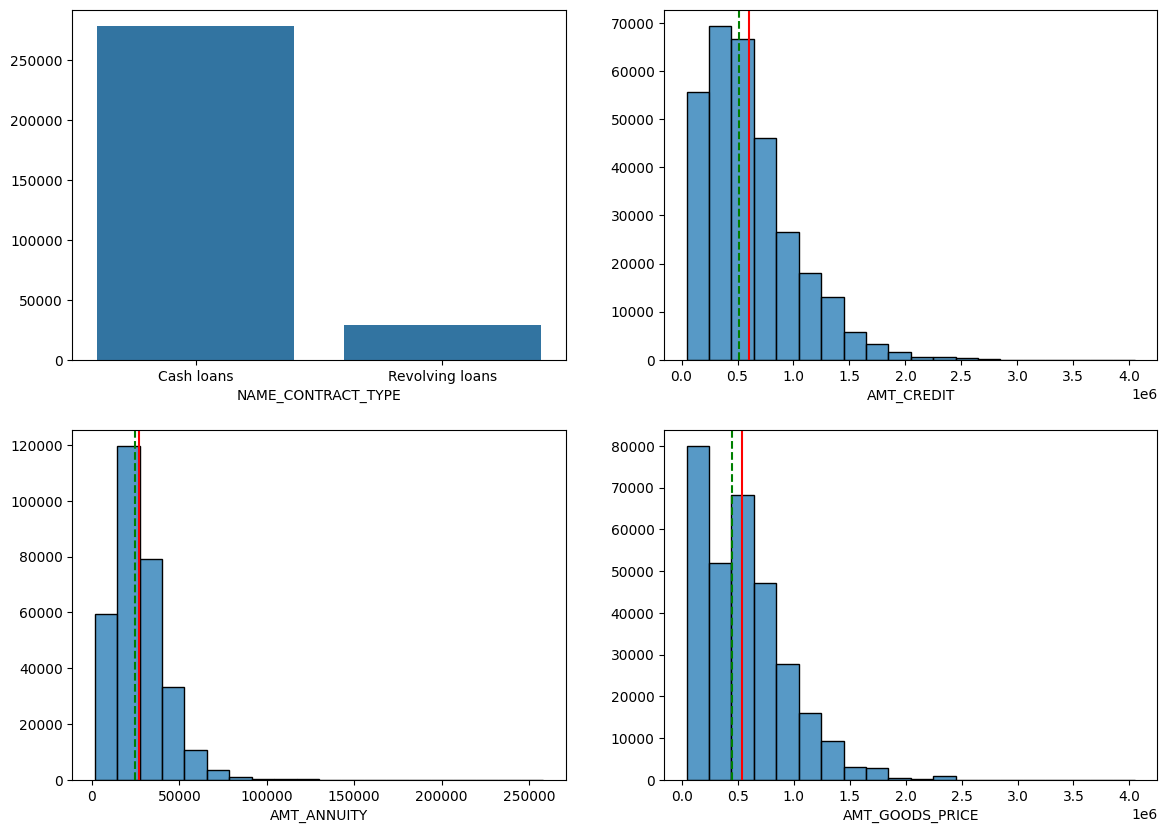

In [140]:
multi_dtype_plot(app_train_df_withbool, transaction_cols, 2, 2, align='center')

In [141]:
percent_summary(app_train_df_withbool, 'NAME_CONTRACT_TYPE', items=2)

NAME_CONTRACT_TYPE
Cash loans: 90.48%
Revolving loans: 9.52%



### Insights
- Nine out of ten contracts are cash loans, with one out of ten being a revolving loan.
- The amount distributions for credit, annuity, and goods price are all positively skewed. Outliers are not present, supported by the close values between the mean and median.
- The amount medians are: 513531 for credit, 24903 for annuity, and 450,000 for goods price.

# Bivariate Analysis

## Numeric Features

<Axes: xlabel='call_fails'>

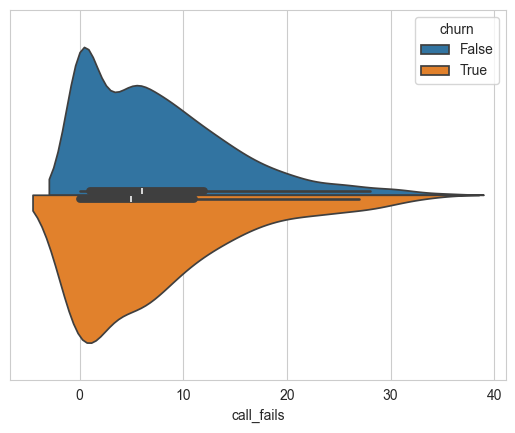

In [10]:
sns.violinplot(data=df, x='call_fails', hue='churn', split = True)

**Observation**
- The two violin plots show similar distributions, in terms of shape, the median, and IQRs. Call fails might not be a good indicator of churn.

complained,False,True
churn,,
False,0.898591,0.170124
True,0.101409,0.829876


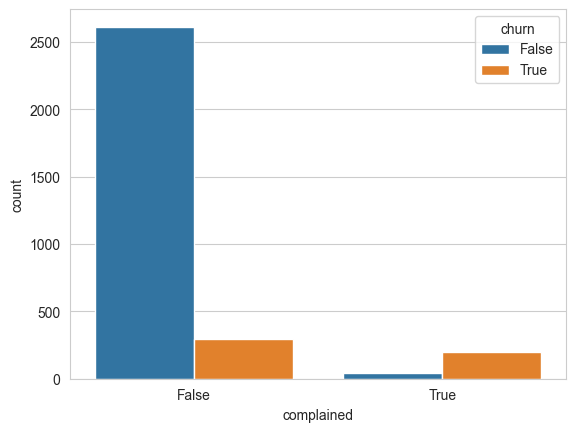

In [15]:
sns.countplot(data=df, x='complained', hue='churn')

plan_vs_complained_tab = pd.crosstab(df['churn'], df['complained'])
plan_vs_complained_tab = plan_vs_complained_tab / plan_vs_complained_tab.sum()
plan_vs_complained_tab

**Observation**
- Customers who have not complained have a 10.1% churn rate.
- Customers who have complained have a whopping 82.9% churn rate.

**Implication**
- This is considered to be an important feature for modeling.

<Axes: xlabel='sub_length'>

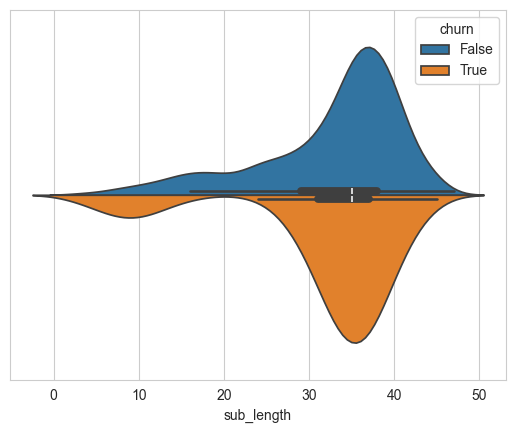

In [26]:
sns.violinplot(data=df, x='sub_length', hue='churn', split = True)

**Observation**
- The distributions and medians are similar. This is not a strong feature to identify churn. 

<Axes: xlabel='charge_amt', ylabel='count'>

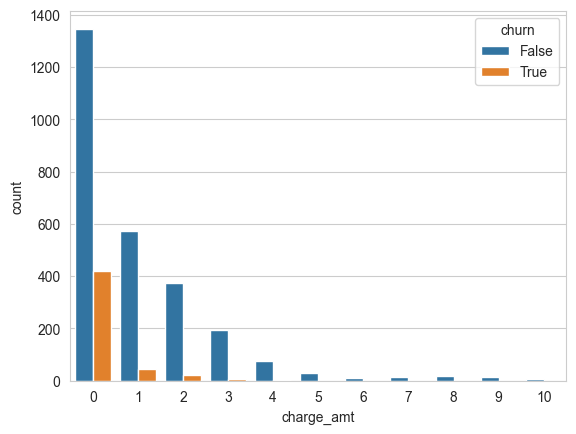

In [13]:
sns.countplot(x='charge_amt', hue='churn', data=df)

Just to check the proportion of the values beyond x=3 (since non-churners have a low count as well):

Text(0.5, 1.0, "Ratio of customers' churning activity at each charge bracket")

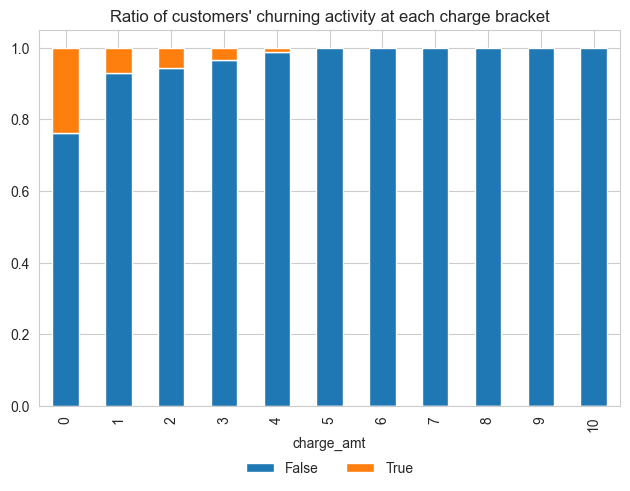

In [14]:
x_var, y_var = "charge_amt", "churn"
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)
plt.legend(
    bbox_to_anchor=(0.5, -0.2),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
plt.tight_layout()
plt.title("Ratio of customers' churning activity at each charge bracket")

**Observation**
- We can see here that customers who churn have only paid up to scale 4 charge. This indicates that churn is more likely to occur with customers on less expensive plans.

**Implication**
- We consider charge amount to be an important feature.

<Axes: xlabel='seconds_used'>

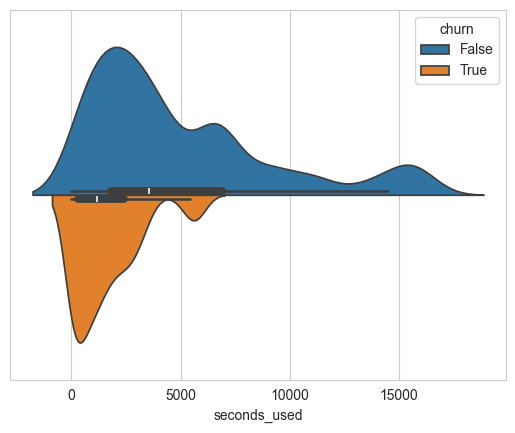

In [30]:
sns.violinplot(data=df, x='seconds_used', hue='churn', split = True)

**Observations**
- Churners' total call lenghts are generally less than those who did not churn, and the distribution is tighter for the churned people.
- Median and IQR values are also distinct.


**Implication**
- Call lengths are considered as important features.

<Axes: xlabel='usage_freq'>

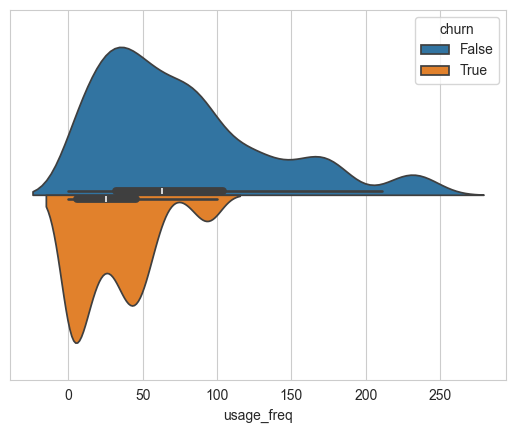

In [32]:
sns.violinplot(data=df, x='usage_freq', hue='churn', split = True)

**Observation**
- Churning customers have a narrower distribution and a less median value as well.

**Implication**
- Usage or call frequency is considered as an important feature.

<Axes: xlabel='sms_freq'>

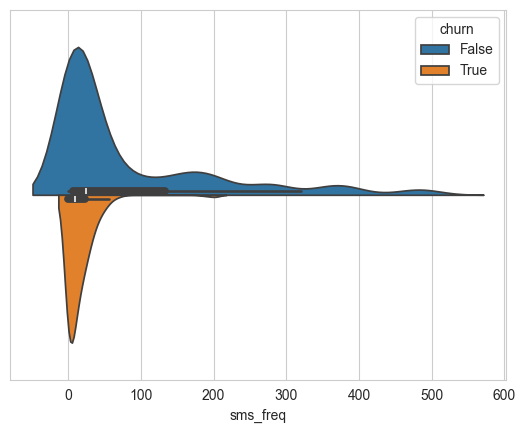

In [34]:
sns.violinplot(data=df, x='sms_freq', hue='churn', split = True)

**Observation**
- The medians are close here and the distributions are alike too, but are different past 100 text messages (and consequently the IQR): there is a minor presence of churn only about 200 SMSs and non for the rest. On the other hand, the SMS for the non-churned customers are more prominent for those with more than 100 SMS.

**Implication**
- SMS frequency is a potential churn indicator.

<Axes: xlabel='unique_contacts_called'>

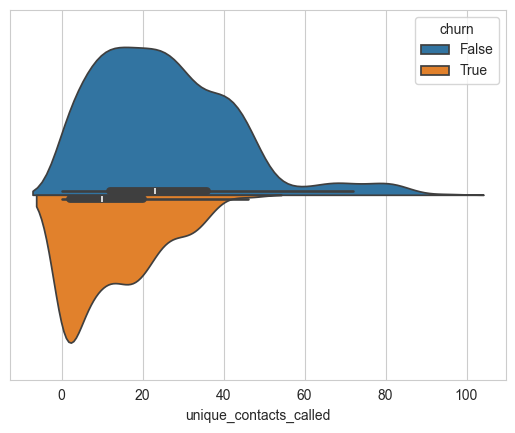

In [18]:
sns.violinplot(data=df, x='unique_contacts_called', hue='churn', split = True)

**Observation**
- Churning customers have had less unique contacts called in contrast to the non-churning customers.
- The churn distribution is positively-skewed, and has a lower mean than the non-churn distribution. Meanwhile, the non-churn distribution has a heavy distribution about its median, with a longer tail of close values from 60 to 80 unique contacts called.

**Implication**
- Consider unique contacts called as an important feature.

churn,False,True
tariff_plan,,
Contractual,0.090019,0.012121
Prepaid,0.909981,0.987879


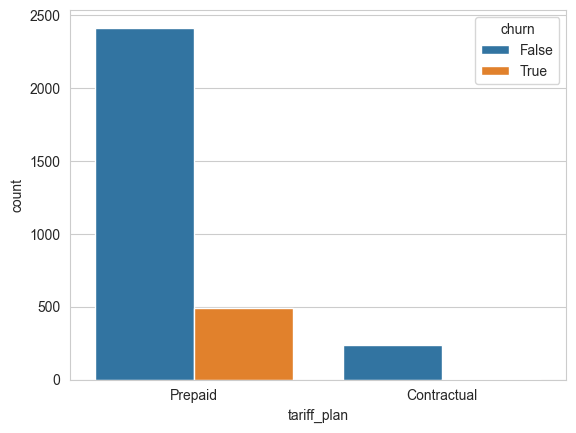

In [49]:
sns.countplot(data=df, x='tariff_plan', hue='churn')

plan_vs_churn_tab = pd.crosstab(df['tariff_plan'], df['churn'])
plan_vs_churn_tab = plan_vs_churn_tab / plan_vs_churn_tab.sum()
plan_vs_churn_tab

**Observation**
- For this dataset, churn on prepaid plan is **9.00%**, while **1.21%** on contractual plans. The difference is 9-fold.

**Implication**
- The tariff plan is considered as an important feature.

status,Active,Inactive
churn,,
False,0.947213,0.526854
True,0.052787,0.473146


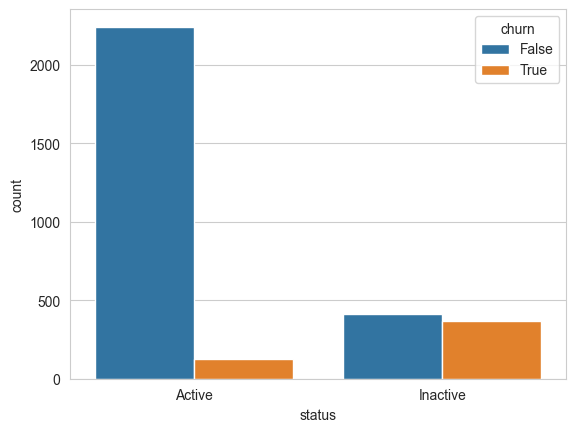

In [52]:
sns.countplot(data=df, x='status', hue='churn')

status_vs_churn_tab = pd.crosstab(df['churn'], df['status'])
status_vs_churn_tab = status_vs_churn_tab / status_vs_churn_tab.sum()
status_vs_churn_tab

**Observation**
- Active accounts have a churn rate of **5.27%**, while inactive accounts have a significantly larger 47.3% churn rate.

**Implication**
- The status is considered as an important feature.

age,15,25,30,45,55
churn,,,,,
False,1.0,0.822565,0.838596,0.8,0.988235
True,0.0,0.177435,0.161404,0.2,0.011765


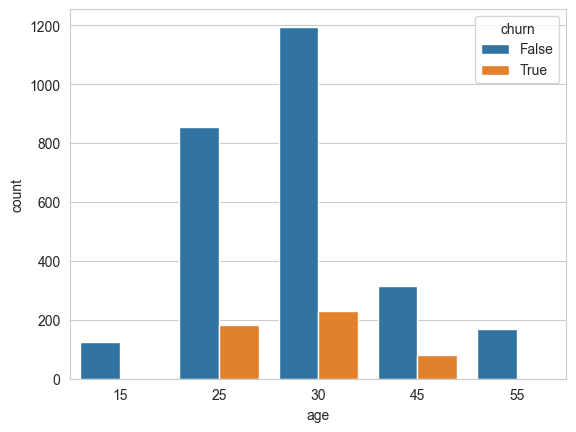

In [60]:
sns.countplot(x='age', hue='churn', data=df)

status_vs_churn_tab = pd.crosstab(df['churn'], df['age'])
status_vs_churn_tab = status_vs_churn_tab / status_vs_churn_tab.sum()
status_vs_churn_tab

**Observations**
- Almost all the churners are from the ages 25, 30, and 45 with churn rates **17.7%**, **16.1%**, and **20.0%**.
- There is **0.00%** churn rate from age 15 and **1.17%** for age 55.

**Implication**
- Age is considered as an important feature.

<Axes: xlabel='cust_value'>

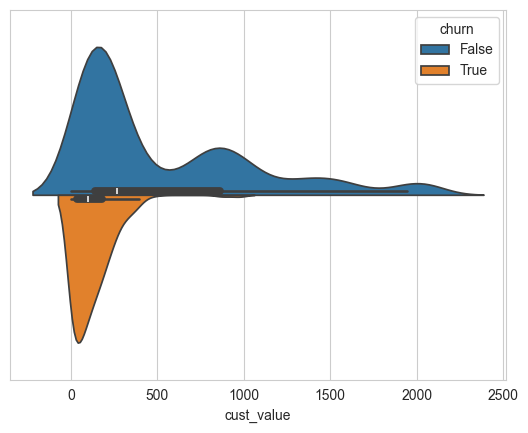

In [21]:
sns.violinplot(data=df, x='cust_value', hue='churn', split = True)

**Observation**
- The distributions are most different beyond customer value 500. Churning customers tend to have a value less than 500, while for non-churning customers, there is more variability for their customer values.

**Implication** 
- Customer value is considered as an important feature.

# Multivariate Analysis

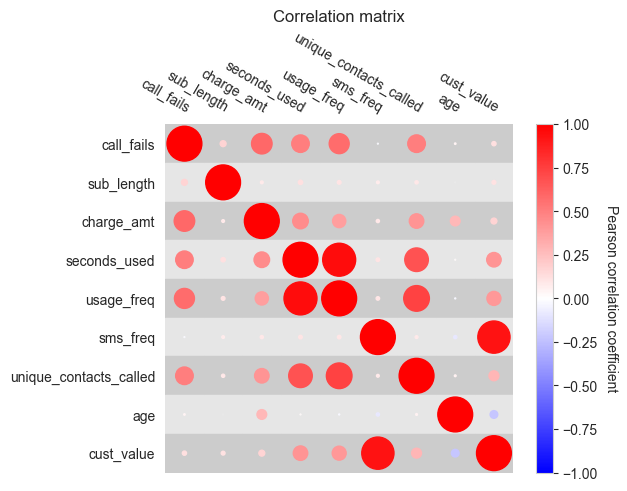

In [68]:
num_list = list(['call_fails', 'sub_length', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value'])
correl_data = df[num_list]
correl_matrix = correl_data.corr()

from psynlig import plot_correlation_heatmap

kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'bwr',
    }
}

plot_correlation_heatmap(correl_data, bubble=True, annotate=False, **kwargs)

plt.title('Correlation matrix')
plt.show()

**Observations**
- From a common sense standpoint, it makes sense that usage (call) frequency is highly correlated with total length of calls. More calls leads to longer total call length. 
- I assume that the customer activity is one of the components when computing the customer value, but it happens that SMS frequency has the highest correlation with customer value.

**Action**
- We have multicollinearity, so we'll use the variance inflation factor.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sub_length is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'usage_freq', 'sms_freq', 'unique_contacts_called', 'age', 'cust_value']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature        VIF
0              call_fails   4.749882
1              charge_amt   2.964811
2            seconds_used  33.818931
3              usage_freq  37.993574
4                sms_freq  37.562895
5  unique_contacts_called   6.773448
6                     age   3.274927
7              cust_value  56.329023


For trial purposes, I will remove usage_freq and cust_value for the following reasons: 
- seconds_used is more skewed than usage_freq; and 
- sms_freq is the independent variable in contrast to the cust_value.

In [81]:
# usage_freq, cust_value is removed
X = df[['call_fails', 'charge_amt', 'seconds_used', 'sms_freq', 'unique_contacts_called', 'age']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  Feature       VIF
0              call_fails  3.679296
1              charge_amt  2.220766
2            seconds_used  4.315929
3                sms_freq  1.394353
4  unique_contacts_called  5.568227
5                     age  2.904331


A VIF of 0-5 indicates low correlation, and 5-10 is still an acceptable value. I think we have found our features!

# Recap
- The following numerical variables are considered as good predictors for churn: complained, charge_amt, seconds_used, usage_freq, sms_freq, unique_contacts_called, cust_value.
- For the categorical variables, potential predictors are: complained, tariff_plan, status, age bracket (as ordinal categorical).
- Reconsider dropping features vs. combining using PCA or using feature selection methods.